In [1]:
#using mnist for autoencoding and decoding the data
from keras.datasets import mnist
#using numpy for storing image data
import numpy as np
from keras.layers import Input, Dense
#using functional API model
from keras.models import Model

Using TensorFlow backend.


In [2]:
#Loading the data
(xs_train1, _), (xs_test1, _) = mnist.load_data()
#Normalizing the data
xs_train1 = xs_train1.astype('float32') / 255.0
x_tsest1 = x_tsest1.astype('float32') / 255.0
#reshaping the data
xs_train1 = xs_train1.reshape((len(xs_train1), np.prod(xs_train1.shape[1:])))
xs_test1 = xs_test1.reshape((len(xs_test1), np.prod(xs_test1.shape[1:])))

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
encoding_dim1 = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# placeholder
input_img1 = Input(shape=(784,))
#encoding registration fron input
encode = Dense(encoding_dim1, activation='relu')(input_img1)
# reconstruction of input
decode = Dense(784, activation='sigmoid')(encode)
# model maps between an input to its reconstructions
autoencoder12 = Model(input_img1, decode)
# encoded reprensentation
autoencoder12.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
#encoding the data
autoencoder12.fit(xs_train1, xs_train1,
                epochs=15,
                batch_size=256,
                shuffle=True,
                validation_data=(xs_test1, xs_test1))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 41us/step - loss: 0.3700 - val_loss: 0.2710
Epoch 2/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.2634 - val_loss: 0.2523
Epoch 3/15
60000/60000 [==============================] - 2s 39us/step - loss: 0.2420 - val_loss: 0.2300
Epoch 4/15
60000/60000 [==============================] - 2s 38us/step - loss: 0.2222 - val_loss: 0.2121
Epoch 5/15
60000/60000 [==============================] - 2s 38us/step - loss: 0.2067 - val_loss: 0.1988
Epoch 6/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.1952 - val_loss: 0.1889
Epoch 7/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.1864 - val_loss: 0.1810
Epoch 8/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.1792 - val_loss: 0.1743
Epoch 9/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.1729 - val_loss: 0.1685
Epoch

BEFORE ENCODING

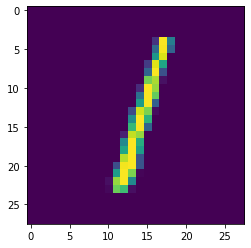

In [6]:
#displaying the image before encoding
from matplotlib import pyplot as plt
plt.imshow(xs_test1[2].reshape(28,28))
plt.show()

AFTER AUTOENCODING

In [0]:
#predicting the image 
axs=autoencoder12.predict(xs_test1[2:])

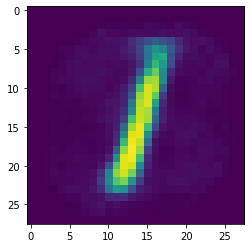

In [8]:
#image after encoding
from matplotlib import pyplot as plt
plt.imshow(axs[0].reshape(28,28))
plt.show()

ADDING RANDOM NOISE

In [0]:
#decoding the data by adding random noise to it 
nsoise_factor = 0.5
xs_train_noisy1 = xs_train1 + nsoise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train1.shape)
xs_test_noisy1 = xs_test1 + nsoise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test1.shape)

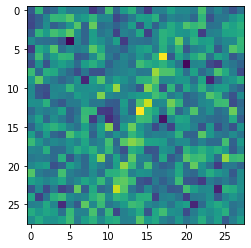

In [10]:
#displaying model after adding the noise
from matplotlib import pyplot as plt
plt.imshow(xs_test_noisy1[2].reshape(28,28))
plt.show()

DECODING IMAGE

In [0]:
#encoding the image
axs1=autoencoder12.predict(xs_test_noisy1[2:])

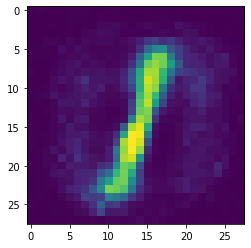

In [12]:
#displaying the image after encoding the image
from matplotlib import pyplot as plt
plt.imshow(axs1[0].reshape(28,28))
plt.show()